<a href="https://www.kaggle.com/code/sanhitasaxena/graduate-admission-prediction-using-ann?scriptVersionId=160643706" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
# loading data
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
350,351,318,107,3,3.0,3.5,8.27,1,0.74
260,261,327,108,5,5.0,3.5,9.13,1,0.87
156,157,315,105,3,2.0,2.5,8.34,0,0.70
371,372,324,110,3,3.5,3.0,9.22,1,0.89
92,93,298,98,2,4.0,3.0,8.03,0,0.34
271,272,299,96,2,1.5,2.0,7.86,0,0.54
105,106,316,110,3,4.0,4.5,8.78,1,0.69
263,264,324,111,3,2.5,1.5,8.79,1,0.70
437,438,317,106,1,1.5,3.5,7.65,1,0.61
366,367,320,104,3,3.5,4.5,8.34,1,0.74


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# splitting data into dependent and independent columns

X=df.drop(columns=['Chance of Admit ','Serial No.'], axis=1)
y=df['Chance of Admit ']

In [8]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=999)

In [9]:
# scaling data

from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()

x_train_scaled= scale.fit_transform(x_train)
x_test_scaled= scale.transform(x_test)

In [10]:
# importing necessary libraries to build ANN model

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
# bulding model

model= Sequential()

# adding layers
model.add(Dense(14, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                112       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [14]:
# training model

history= model.fit(x_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 0.3806 - val_loss: 0.3200
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2778 - val_loss: 0.2274
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1912 - val_loss: 0.1525
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1249 - val_loss: 0.0955
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0757 - val_loss: 0.0563
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0439 - val_loss: 0.0326
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0255 - val_loss: 0.0208
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 11/100
7/7 [=========

In [15]:
ypred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [16]:
# checking r2 score

from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.8292718436475652

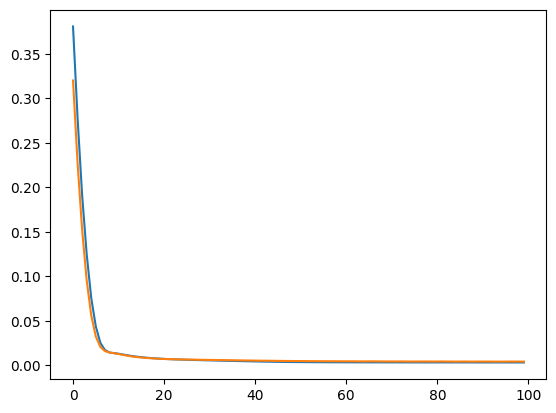

In [17]:
# plots to check the model performance
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])